In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

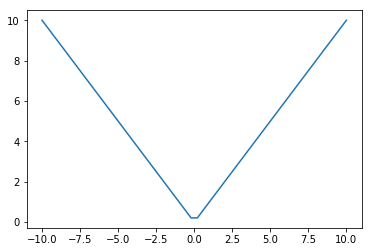

In [10]:
%matplotlib inline
x = np.linspace(-10,10)
f = np.piecewise(x, [x < 0, x >= 0], [lambda x: -x, lambda x: x])

plt.plot(x,f)

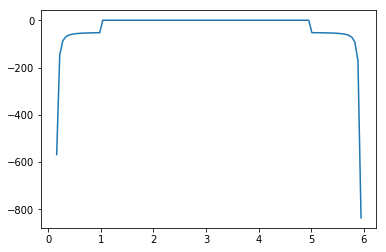

In [138]:
x = np.linspace(0.16,5.95, 100)

f1 = np.piecewise(x, [(x < 1) &  (x>0.01) ,(x>=1) & (x<5) ,(x >= 5) & (x<6)], [lambda x: -np.exp(1/((x)))-50, 
                                                                               0,
                                                                        lambda x: -np.exp(-1/((x-6.1)))-50])
plt.plot(x,f1)

# Rewards for the tank's levels

In [166]:
#########

b = 0.1
c = 0.6
e = 0.9

p0 = 0.7

M = 1
P = 1


######


a = b/10
f = 1-(1-e)/10
d = p0*e+(1-p0)*c



def str_line1(x):
    m = 1
    n = -c
    return((m*x+n)/(c-b))

def str_line2(x):
    m = 1
    n = -c
    return(M*(m*x+n)/(d-c))

def str_line3(x):
    m = 1
    n = -e
    return(M*(m*x+n)/(d-e))

def exp1(x):
    A = 10**(-P/b * (1/a-1/b)**(-1))
    l1 = P*(1/a-1/b)**(-1) * np.log(10)
    return(-A*np.exp(l1/x))

def exp2(x):
    B = 10**(-P/(1-e) * (1/(1-f)-1/(1-e))**(-1))
    l2= P*(1/(1-f)-1/(1-e))**(-1) * np.log(10)
    return(-B * np.exp(l2/(1-x)) ) 

    

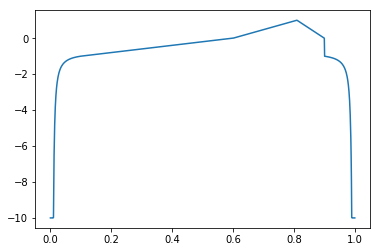

In [167]:
x = np.linspace(0,1, 1000)
conditions = [(x>=0) & (x < a),
              (x>=a) & (x<b),
              (x>=b) & (x<c),
              (x>=c) & (x<d),
              (x>=d) & (x<e),
              (x>=e) & (x<f),
              (x>f) & (x<=1)]

functions = [-10**P,
             lambda x: exp1(x),
             lambda x: str_line1(x),
             lambda x: str_line2(x),
             lambda x: str_line3(x),
             lambda x: exp2(x),
             -10**P]
R = np.piecewise(x,conditions , functions)
plt.plot(x,R)

In [168]:
def R_levels(x, C_max):
    if(x>C_max):
        raise Exception("Load x is greater than C_max in R_levels.")
    x = x/C_max
    
    conditions = [(x>=0) & (x < a),
              (x>=a) & (x<b),
              (x>=b) & (x<c),
              (x>=c) & (x<d),
              (x>=d) & (x<e),
              (x>=e) & (x<f),
              (x>f) & (x<=1)]

    functions = [-10**P,
             lambda x: exp1(x),
             lambda x: str_line1(x),
             lambda x: str_line2(x),
             lambda x: str_line3(x),
             lambda x: exp2(x),
             -10**P]
    
    return(np.piecewise(x,conditions, functions))

In [169]:
R_levels(999, 1000)

array(-10.0)

# Rewards for the transport, and costful things

In [170]:
t=6
truck_size = 0  # 0 is small, 1 is big

if truck_size == 0:
    tf = 1.32 # transport factor
else:
    tf = 1

if t%7 == 0:
    hf = 1.25 # holidays factor
else:
    hf = 1
    
coeff = 0.0075 * 580/1000 * 11.86
tcf = coeff * tf * hf  # truck cost factor
w = np.array([60,150]) # distances from depot to tanks
u = np.array([20,50]) # truck unload quantities

In [171]:
def R_transport(tcf, w, u):
    return(np.sum(tcf * w * u))

In [172]:
R_transport(tcf, w, u)

592.47104399999978